<a href="https://colab.research.google.com/github/DanielAsvel/Classifica-o-de-fraudes/blob/main/Estudo_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Agurpamento em questionario de personalidade

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster      import KMeans
from yellowbrick.cluster  import KElbowVisualizer

pd.options.display.float_format="{:.2f}".format

In [75]:
base = pd.read_csv('/content/drive/MyDrive/estudo ML/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t') #obitendo dados

In [ ]:
base.describe() # Descriminando os dados

In [78]:
base.drop(base.columns[50:110], axis=1, inplace=True) # Eliminado colunas irrelevantes

In [ ]:
base.shape

In [ ]:
base['EXT1'].value_counts()

In [81]:
base= base[(base>0).all(axis=1)] # Obtendo valores acima de ZERO

In [ ]:
base.describe()

## Fazendo o Agrupamente(Cluster)

In [83]:
grupo = KMeans() # Agripando 
visualizar = KElbowVisualizer(grupo, k=(2,10))

In [84]:
base5000 = base.sample(n=5000, random_state=1) # Utilizando apenas 5000 amonstras para fazer um pré agrupamento

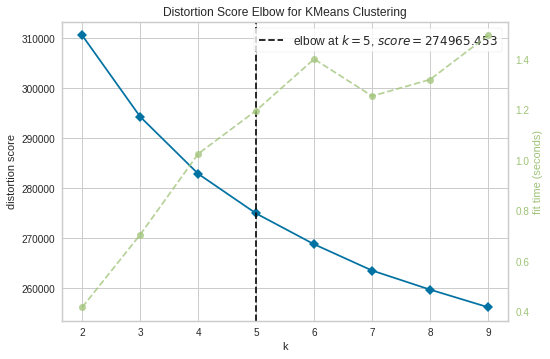

In [85]:
visualizar.fit(base5000) # Visualizando os grupos
visualizar.poof()

In [86]:
grupo = KMeans(n_clusters=5) # Separando em 5 gurpos
grupo5 = grupo.fit(base)

In [ ]:
predicao = grupo5.labels_ # Classificando os agrupamentos e colocando no dataset 'BASE'
base['grupos'] = predicao 

In [ ]:
base.head(10)

In [ ]:
base['grupos'].value_counts()

In [ ]:
base.groupby('grupos').mean() # Mostrando a media dos grupos em relação as questões

In [ ]:
base.columns


In [93]:
col_lista = list(base) # Agrupando em lista cada grupo de questão
ext = col_lista[0:10]
est = col_lista[10:20]
agr = col_lista[20:30]
csm = col_lista[30:40]
opn = col_lista[40:50]

In [102]:
data_soma = pd.DataFrame() # Agrupando por grupo de personalidade, e suas medias correspondentes
data_soma['extrovertidos'] = base[ext].sum(axis=1)/10
data_soma['neuroticos'] = base[est].sum(axis=1)/10
data_soma['agradavel'] = base[agr].sum(axis=1)/10
data_soma['responsavel'] = base[csm].sum(axis=1)/10
data_soma['aberto'] = base[opn].sum(axis=1)/10
data_soma['grupos'] = predicao

In [ ]:
data_soma.groupby('grupos').mean() # Monstrando agrupamento em relação a media dos grupos

In [98]:
data_clusters = data_soma.groupby('grupos').mean()

In [ ]:
plt.figure(figsize=(22,3)) # Monstrando o grafico em relação aos grupos
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);